#資料分析程式碼
#資料分析程式碼（佔總成績50%）
#資料集規格：自選資料集（至多使用2個）完成所有分析要求，原始資料不得小於1000筆/列。
#程式規格：全部執行出結果的 .ipynb檔，並於撰寫的功能加上標題（使用Markdown或heading）
#實作項目規格：請依下表選擇實作的項目，各項評分只有完成/未完成兩種分數(滿分/0分)。老師若有建議會再直接回覆，與計分無關。

作業目的：檢視近期成立公司與解散公司的數量與資本總額, 來驗證台灣是否在投資擴張或緊縮



In [445]:
import pandas as pd
#讀取CSV 資料來源開放政府 公司設立登記清冊(201610) http://data.gov.tw/node/6047
#讀取CSV 
df1 = pd.read_csv("公司設立登記清冊201610.csv",encoding="utf8") 
df1[:5]

,序號,統一編號,公司名稱,公司所在地,代表人,資本額,核准設立日期
0,1,28114200,鼎謙科技股份有限公司,苗栗縣竹南鎮科東三路18號1樓,陳子江,4000000,1051006
1,2,28114216,創玖科技股份有限公司,新竹市力行一路1號1樓之1B5-3,李俊毅,1000000,1051014
2,3,51017601,大陸商太倉廣福農業開發有限公司,臺北市信義區忠孝東路5段1-8號2樓,谷非,0,1051006
3,4,51034209,澳洲商盈盛市場行銷顧問股份有限公司,臺北市中山區松江路122號11樓,郭舜宜,1000000,1051003
4,5,51039204,菲律賓商主恩漁業股份限公司,高雄市前鎮區萬和街12號13樓,Benjamin Chua III,0,1051013


In [446]:
# 公司解散登記清冊(201610) http://data.gov.tw/node/6049
df2 = pd.read_csv("公司解散登記清冊201610.csv",encoding="utf8")
df2[:5]

,"﻿""序號""",統一編號,公司名稱,公司所在地,代表人,資本額,核准設立日期,核准解散日期
0,1,673435,基山鐘錶眼鏡有限公司,基隆市忠二路三二號,NaN,500000,640816,1051007
1,2,3207048,利泰科學儀器有限公司,臺北市松山區寶清街34號1樓,NaN,1500000,740808,1051014
2,3,3600470,東益貿易股份有限公司,臺北市中山區復興北路2號11樓之6,NaN,50000000,480304,1051004
3,4,4383850,幸德實業股份有限公司,臺北市大同區重慶北路3段96號3樓之2,NaN,5000000,620808,1051006
4,5,4506500,汎辰企業有限公司,新北市三重區重陽路4段41號(1樓),NaN,2000000,710429,1051020


資料預處理（清理、轉換、JOIN）:

In [447]:
#清理NaN, 將上述設立公司csv檔中未有代表人,資本額的做清除動作
df1 = df1[df1['代表人'].notnull()]
df1 = df1[df1['資本額'].notnull()]

del df1['代表人'] #移除代表人欄位
df1[:5]

,序號,統一編號,公司名稱,公司所在地,資本額,核准設立日期
0,1,28114200,鼎謙科技股份有限公司,苗栗縣竹南鎮科東三路18號1樓,4000000,1051006
1,2,28114216,創玖科技股份有限公司,新竹市力行一路1號1樓之1B5-3,1000000,1051014
2,3,51017601,大陸商太倉廣福農業開發有限公司,臺北市信義區忠孝東路5段1-8號2樓,0,1051006
3,4,51034209,澳洲商盈盛市場行銷顧問股份有限公司,臺北市中山區松江路122號11樓,1000000,1051003
4,5,51039204,菲律賓商主恩漁業股份限公司,高雄市前鎮區萬和街12號13樓,0,1051013


In [448]:
#解散公司資料多數未列上代表人, 儘清除資本額
df2 = df2[df2['資本額'].notnull()]

del df2['代表人']
df2[:5]  

,"﻿""序號""",統一編號,公司名稱,公司所在地,資本額,核准設立日期,核准解散日期
0,1,673435,基山鐘錶眼鏡有限公司,基隆市忠二路三二號,500000,640816,1051007
1,2,3207048,利泰科學儀器有限公司,臺北市松山區寶清街34號1樓,1500000,740808,1051014
2,3,3600470,東益貿易股份有限公司,臺北市中山區復興北路2號11樓之6,50000000,480304,1051004
3,4,4383850,幸德實業股份有限公司,臺北市大同區重慶北路3段96號3樓之2,5000000,620808,1051006
4,5,4506500,汎辰企業有限公司,新北市三重區重陽路4段41號(1樓),2000000,710429,1051020


資料預處理:轉換,將公司所在地&資本額做分組所在地取出前面的縣市資訊取出做後續分佈判讀

In [449]:
#先將DataFrame取出所在地、資本額做後續分群使用
df1_loc=df1['公司所在地'].map(lambda x: str(x)[0:3])
#新增欄到設立公司的dataframe中
df1['所在地']=df1_loc
df1[:5]

,序號,統一編號,公司名稱,公司所在地,資本額,核准設立日期,所在地
0,1,28114200,鼎謙科技股份有限公司,苗栗縣竹南鎮科東三路18號1樓,4000000,1051006,苗栗縣
1,2,28114216,創玖科技股份有限公司,新竹市力行一路1號1樓之1B5-3,1000000,1051014,新竹市
2,3,51017601,大陸商太倉廣福農業開發有限公司,臺北市信義區忠孝東路5段1-8號2樓,0,1051006,臺北市
3,4,51034209,澳洲商盈盛市場行銷顧問股份有限公司,臺北市中山區松江路122號11樓,1000000,1051003,臺北市
4,5,51039204,菲律賓商主恩漁業股份限公司,高雄市前鎮區萬和街12號13樓,0,1051013,高雄市


In [450]:
df2_loc=df2['公司所在地'].map(lambda x: str(x)[0:3])  #將所在地新增放入dataframe
df2['所在地']=df2_loc
df2[:5]

,"﻿""序號""",統一編號,公司名稱,公司所在地,資本額,核准設立日期,核准解散日期,所在地
0,1,673435,基山鐘錶眼鏡有限公司,基隆市忠二路三二號,500000,640816,1051007,基隆市
1,2,3207048,利泰科學儀器有限公司,臺北市松山區寶清街34號1樓,1500000,740808,1051014,臺北市
2,3,3600470,東益貿易股份有限公司,臺北市中山區復興北路2號11樓之6,50000000,480304,1051004,臺北市
3,4,4383850,幸德實業股份有限公司,臺北市大同區重慶北路3段96號3樓之2,5000000,620808,1051006,臺北市
4,5,4506500,汎辰企業有限公司,新北市三重區重陽路4段41號(1樓),2000000,710429,1051020,新北市


In [451]:
df2.corr()

,"﻿""序號""",統一編號,資本額,核准設立日期,核准解散日期
"﻿""序號""",1.000000,0.952327,0.034121,0.070035,0.016460
統一編號,0.952327,1.000000,0.034579,-0.072577,0.000387
資本額,0.034121,0.034579,1.000000,-0.025129,0.003222
核准設立日期,0.070035,-0.072577,-0.025129,1.000000,0.057618
核准解散日期,0.016460,0.000387,0.003222,0.057618,1.000000


In [452]:
#先將DataFrame取出資本額做後續統計使用
df1_cap=df1['資本額']
df1_cap[:5]

0    4000000
1    1000000
2          0
3    1000000
4          0
Name: 資本額, dtype: int64

In [453]:
df2_cap=df2['資本額']  #解散公司的資本額
df2_cap[:5]

0      500000
1     1500000
2    50000000
3     5000000
4     2000000
Name: 資本額, dtype: int64

投資活動在資本擴張或是緊縮? (設立公司資本額 - 解散公司資本額 )

In [454]:
sum_row1=df1[["資本額"]].sum() #設立公司總資本額
sum_row2=df2[["資本額"]].sum() #解散公司總資本額

x = sum_row1-sum_row2   #設立公司的總資本額 - 解散公司的總資本額 (正為投資擴張, 負為投資緊縮)
x

資本額   -297405367
dtype: int64

透過JOIN: 檢查df1, df2,看有無同時解散又成立公司的條件存在,以避免來源資料有重複key-in

In [455]:
df3 = pd.merge(df1,df2,left_on='統一編號',right_on='統一編號',how='inner')
df3[:5]

,序號,統一編號,公司名稱_x,公司所在地_x,資本額_x,核准設立日期_x,所在地_x,"﻿""序號""",公司名稱_y,公司所在地_y,資本額_y,核准設立日期_y,核准解散日期,所在地_y


使⽤樞紐分析表來察看哪些地方有較多的公司設立活動

In [476]:
#新增資料年月到dataframe
df1['年月']=df1['核准設立日期'].map(lambda x: str(x)[0:5])
#利用Pivot Table來檢視看各縣市設立公司的資本總額
df1_pivot = df1.pivot_table(values='資本額',index=['年月'],columns='所在地',aggfunc='sum')
df1_pivot.T #存在df1_pivot並轉置pivot table以便閱讀
df1_sorted = df1_pivot.T.sort_values(['10510'],ascending=False) #排序從投資最多的城市到投資最低的
df1_sorted[:5]

年月,10509,10510
所在地,,
臺北市,113520000.0,3.476749e+09
新北市,33128000.0,1.784716e+09
臺中市,51185000.0,1.565947e+09
高雄市,241065000.0,1.535148e+09
臺南市,13400000.0,1.418524e+09


In [477]:
df2['年月']=df1['核准設立日期'].map(lambda x: str(x)[0:5])
#利用Pivot Table來檢視看各縣市解散公司的資本總額
df2_pivot=df2.pivot_table(values='資本額',index=['年月'],columns='所在地',aggfunc='sum')

df2_sorted = df2_pivot.T.sort_values(['10510'],ascending=False) #排序從投資最多的城市到投資最低的
df2_sorted[:5]

年月,10509,10510
所在地,,
臺北市,211600000.0,7.731636e+09
高雄市,254100000.0,9.915680e+08
桃園市,31000000.0,8.987300e+08
臺中市,50000000.0,7.540870e+08
新北市,126100000.0,7.288849e+08


資料分析方法擇二: 統計分析、相關性分析 (統計分析、相關性分析、購物籃分析、時間序列分析、主次因素分析）

In [458]:
df1_cap.describe() #描述性統計描述設立公司現況

count    3.514000e+03
mean     3.536108e+06
std      1.865870e+07
min      0.000000e+00
25%      5.000000e+05
50%      1.000000e+06
75%      2.000000e+06
max      6.000000e+08
Name: 資本額, dtype: float64

In [459]:
df2_cap.describe()  #描述性統計描述解散公司的資本額

count    1.573000e+03
mean     8.088549e+06
std      1.531868e+08
min      0.000000e+00
25%      5.000000e+05
50%      1.000000e+06
75%      5.000000e+06
max      6.063000e+09
Name: 資本額, dtype: float64

In [460]:
df1_cap = df1_cap.rename(columns = {'資本額','設立公司資本額'})
df2_cap = df2_cap.rename(columns = {'資本額','解散公司資本額'})

In [461]:
result = pd.concat([df1_cap, df2_cap], axis=1) #左側為設立公司資本額、右側為解散公司資本額
result[:5]

,0,1
0,4000000,500000.0
1,1000000,1500000.0
2,0,50000000.0
3,1000000,5000000.0
4,0,2000000.0


600000000 0


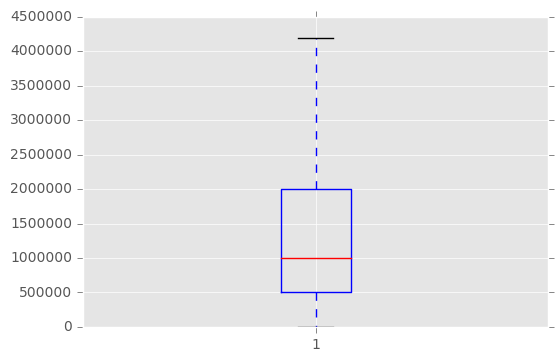

In [462]:
import matplotlib.pyplot as plt  
import numpy as np
plt.style.use('ggplot')

print (df1_cap.max(),df1_cap.min())
r = plt.boxplot(df1_cap, showfliers=False) #透過箱型圖來檢視設立公司資本額分佈
plt.show()

In [463]:
df1.corr()   #相關性分析來看設立公司資料,檢視統一編號有無跟什麼有相關？

,序號,統一編號,資本額,核准設立日期
序號,1.000000,0.975414,-0.031120,0.102127
統一編號,0.975414,1.000000,-0.022234,-0.001749
資本額,-0.031120,-0.022234,1.000000,0.002239
核准設立日期,0.102127,-0.001749,0.002239,1.000000


In [464]:
df2.corr()  #相關性分析來看解散公司資料

,"﻿""序號""",統一編號,資本額,核准設立日期,核准解散日期
"﻿""序號""",1.000000,0.952327,0.034121,0.070035,0.016460
統一編號,0.952327,1.000000,0.034579,-0.072577,0.000387
資本額,0.034121,0.034579,1.000000,-0.025129,0.003222
核准設立日期,0.070035,-0.072577,-0.025129,1.000000,0.057618
核准解散日期,0.016460,0.000387,0.003222,0.057618,1.000000


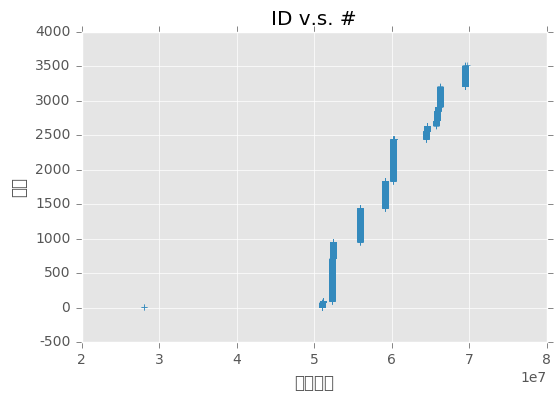

In [465]:
plt.rcParams['axes.unicode_minus']=False 
df1.plot(kind='scatter',title='ID v.s. #',figsize=(6,4),x='統一編號',y='序號',marker='+')

6063000000 0


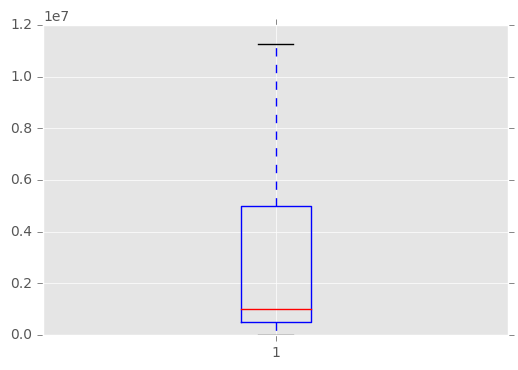

In [466]:
print (df2_cap.max(),df2_cap.min())
plt.boxplot(df2_cap, showfliers=False) #透過箱型圖來檢視解散公司資本額分佈
plt.show()

視覺化擇二： Matplotlib做圖_直方圖、折線圖

In [467]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')

#pandas作圖不使用plt.show()，若要顯示在Jupyter Notebook上，需先執行以下程式碼：（%是在ipython shell中執行command line的意思）
%matplotlib inline

plt.rcParams['font.family']='Simhei' #顯示中文
#對設立公司的資本額做分群, 台灣徵信對於中小型企業有3000萬為一個徵信門檻,經濟部則是製造業、營造業、礦業及土石採取業實收資本額在新臺幣八千萬元以下
bins = [0,300000,8000000,10000000]
pd.cut(df1['資本額'],bins, right=False)
labels = ['C','B','A']

df1['資本規模'] = pd.cut(df1['資本額'],bins, right=False, labels=labels)
df1[:5]

,序號,統一編號,公司名稱,公司所在地,資本額,核准設立日期,所在地,年月,資本規模
0,1,28114200,鼎謙科技股份有限公司,苗栗縣竹南鎮科東三路18號1樓,4000000,1051006,苗栗縣,10510,B
1,2,28114216,創玖科技股份有限公司,新竹市力行一路1號1樓之1B5-3,1000000,1051014,新竹市,10510,B
2,3,51017601,大陸商太倉廣福農業開發有限公司,臺北市信義區忠孝東路5段1-8號2樓,0,1051006,臺北市,10510,C
3,4,51034209,澳洲商盈盛市場行銷顧問股份有限公司,臺北市中山區松江路122號11樓,1000000,1051003,臺北市,10510,B
4,5,51039204,菲律賓商主恩漁業股份限公司,高雄市前鎮區萬和街12號13樓,0,1051013,高雄市,10510,C


In [468]:
#利用Pivot Table來檢視資本規模
df1_scale=df1.pivot_table(values='資本額',index=['年月'],columns='資本規模',aggfunc='sum')
df1_scale

資本規模,C,B,A
年月,,,
10509,3593000,190705000,16800000
10510,81536556,4149444916,189000000


In [469]:
df1_counts = df1.groupby('資本規模').size() #計數總共有幾間設立公司，分屬A(大）,B(中),C(小)企業
df1_counts

資本規模
C     673
B    2560
A      25
dtype: int64

Matplotlib 多圖合一 , 將大型企業、中型企業、小型企業總額與個數同時做圖.
目的在了解台灣設立公司中，中小型企業與大型企業在數量上與貢獻的總資本額的差異

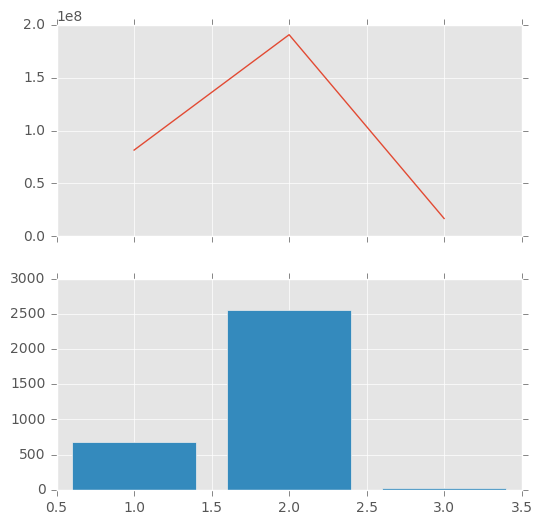

In [470]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(6,6))
x = [1,2,3]  #3表示大型; 2表中型; 1表小型企業
y1 = [81536556,190705000,16800000] 
y2 = [673,2560,25]

ax1 = plt.subplot(211) #2x1的第1張圖
plt.plot(x,y1,'-')
plt.setp(ax1.get_xticklabels(), visible=False) #不顯示x軸ticks
plt.subplot(212,sharex=ax1) #2x1的第2張圖
plt.bar(x,y2,align='center')
plt.show()

In [471]:
#同樣對解散公司的資本額做分群與做圖

bins_dismiss = [0,300000,8000000,10000000]
pd.cut(df2['資本額'],bins, right=False)
labels = ['C','B','A']

df2['資本規模'] = pd.cut(df2['資本額'],bins, right=False, labels=labels)
df2[:5]

,"﻿""序號""",統一編號,公司名稱,公司所在地,資本額,核准設立日期,核准解散日期,所在地,年月,資本規模
0,1,673435,基山鐘錶眼鏡有限公司,基隆市忠二路三二號,500000,640816,1051007,基隆市,10510,B
1,2,3207048,利泰科學儀器有限公司,臺北市松山區寶清街34號1樓,1500000,740808,1051014,臺北市,10510,B
2,3,3600470,東益貿易股份有限公司,臺北市中山區復興北路2號11樓之6,50000000,480304,1051004,臺北市,10510,NaN
3,4,4383850,幸德實業股份有限公司,臺北市大同區重慶北路3段96號3樓之2,5000000,620808,1051006,臺北市,10510,B
4,5,4506500,汎辰企業有限公司,新北市三重區重陽路4段41號(1樓),2000000,710429,1051020,新北市,10510,B


In [472]:
#利用Pivot Table來檢視資本規模
df2_scale=df2.pivot_table(values='資本額',index=['年月'],columns='資本規模',aggfunc='sum')
df2_scale

資本規模,C,B,A
年月,,,
10509,0,280900000,33000000
10510,21418200,2342356819,175590120


In [473]:
df2_counts = df2.groupby('資本規模').size() #計數總共有幾間設立公司，分屬A(大）,B(中),C(小)企業
df2_counts

資本規模
C     166
B    1209
A      25
dtype: int64

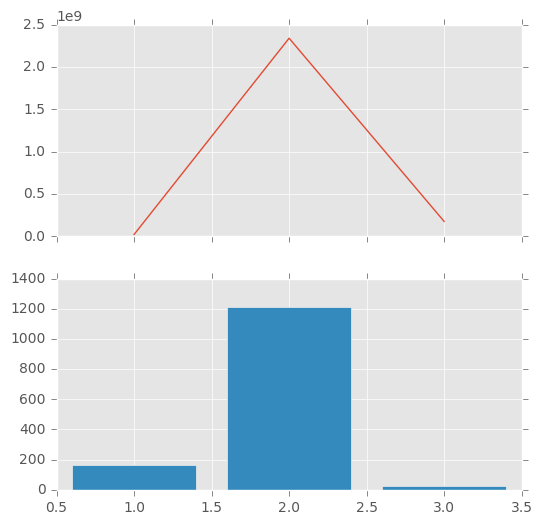

In [474]:
plt.figure(figsize=(6,6))
x = [1,2,3]  #3表示大型; 2表中型; 1表小型企業
y1 = [21418200,2342356819,175590120] 
y2 = [166,1209,25]

ax1 = plt.subplot(211) #2x1的第1張圖
plt.plot(x,y1,'-')
plt.setp(ax1.get_xticklabels(), visible=False) #不顯示x軸ticks
plt.subplot(212,sharex=ax1) #2x1的第2張圖
plt.bar(x,y2,align='center')
plt.show()

基礎機器學習擇一:(線性回歸、Logistic迴歸與評估、決策分類樹與評估、K-means分群與視覺化)